In [1]:
%run ../methods/sudoku-module.py
%run ../graphics/plot-settings.py

In [2]:
import numpy as np

def calculate_indicators(filename):
    sudoku = np.genfromtxt(filename, delimiter=',',dtype=int, missing_values='',filling_values=0)
    sudoku = (sudoku>0).astype(int)
    instance = []
    for i in range(81):
        x,y = divmod(i,9)
        entry = sudoku[3*x:(3*x+3),3*y:(3*y+3)].flatten()
        instance.append(entry/sum(entry))
    instance = np.asarray(instance)
    return [get_energy(instance)[0], get_entropy(instance)]

In [3]:
import glob
filenames = glob.glob("../data/sudoku-states-02/state-*.txt")

results = []
for filename in sorted(filenames):
    results.append(calculate_indicators(filename))
    
temp=np.asarray(results)
energies = temp[:,0]
entropies = temp[:,1]

In [4]:
import pandas as pd

def aggregator(t,E,S,J):
    X = pd.DataFrame(np.transpose(np.asarray([t,E])),columns=['temperature','Energy'])
    Y = X.groupby('temperature').mean()
    Z = Y.diff()
    idx = Z.idxmax()['Energy']
    U = pd.DataFrame(np.transpose(np.asarray([t,S,E])),columns=['T','Entropy','Energy'])
    U['t'] = U.diff()['Energy']/U.diff()['Entropy']
    return(U[1:])

In [5]:
import pickle
interval = [999,72]
results = []

for i in interval:
    solutions = pickle.load(open('../data/resultaten/results-{:0>3.0f}.pkl'.format(i), 'rb'))
    solution = solutions[0]
    result_array=np.array(solution['result'])
    E = result_array[:,0]
    S = result_array[:,1]
    J = result_array[:,-2]
    t = result_array[:,2]
    U = aggregator(t,E,S,J)
    results.append([t,E,S,J,U])  

In [6]:
t,E,S,J,U= results[1]
U = pd.DataFrame(np.transpose(np.asarray([t,S,E])),columns=['T','Entropy','Energy'])
Z=U.groupby('T').min()
positional_index = np.abs(pd.Series(Z.index) - 0.72).idxmin()
closest_index_value = Z.index[positional_index]
closest_row_0 = Z.loc[closest_index_value]

t,E,S,J,U= results[0]
U = pd.DataFrame(np.transpose(np.asarray([t,S,E])),columns=['T','Entropy','Energy'])
Z=U.groupby('T').min()
positional_index = np.abs(pd.Series(Z.index) - 10).idxmin()
closest_index_value = Z.index[positional_index]
closest_row_1 = Z.loc[closest_index_value]

In [7]:
infinity=pd.Series([entropies[0],energies[0]],index=['Entropy','Energy'],name=float('inf'))


t,E,S,J,U= results[0]
U = pd.DataFrame(np.transpose(np.asarray([t,S,E])),columns=['T','Entropy','Energy'])
Z=U.groupby('T').min()

values = []
positional_index = np.abs(pd.Series(Z.index) - 0.5).idxmin()
closest_index_value = Z.index[positional_index]
values.append(Z.loc[closest_index_value])

for i in list(range(1,10)):
    positional_index = np.abs(pd.Series(Z.index) - i).idxmin()
    closest_index_value = Z.index[positional_index]
    values.append(Z.loc[closest_index_value])
    

values_01 = []

positional_index = np.abs(pd.Series(Z.index) - 0.78).idxmin()
closest_index_value = Z.index[positional_index]
values_01.append(Z.loc[closest_index_value])

positional_index = np.abs(pd.Series(Z.index) - 0.72).idxmin()
closest_index_value = Z.index[positional_index]
values_01.append(Z.loc[closest_index_value])

positional_index = np.abs(pd.Series(Z.index) - 10).idxmin()
closest_index_value = Z.index[positional_index]
values_01.append(Z.loc[closest_index_value])

values_01.append(infinity)

In [8]:
yticks = pd.concat([pd.DataFrame(values)['Energy'],pd.DataFrame(values_01)['Energy']])
index_values=yticks.index
index_values = [round(value,2) for value in index_values]
yticklabels = ['{0:.2f}'.format(value) if value < 4 or value > 9 else '' for value in index_values]
yticklabels[-2] = '10.0'

In [9]:
values_01

[Entropy    80.383158
 Energy     53.854097
 Name: 0.7798210898121672, dtype: float64,
 Entropy    44.983597
 Energy     26.947951
 Name: 0.7198367820046713, dtype: float64,
 Entropy    111.882451
 Energy      89.906105
 Name: 10.0, dtype: float64,
 Entropy    112.058453
 Energy      93.444444
 Name: inf, dtype: float64]

<Figure size 640x480 with 0 Axes>

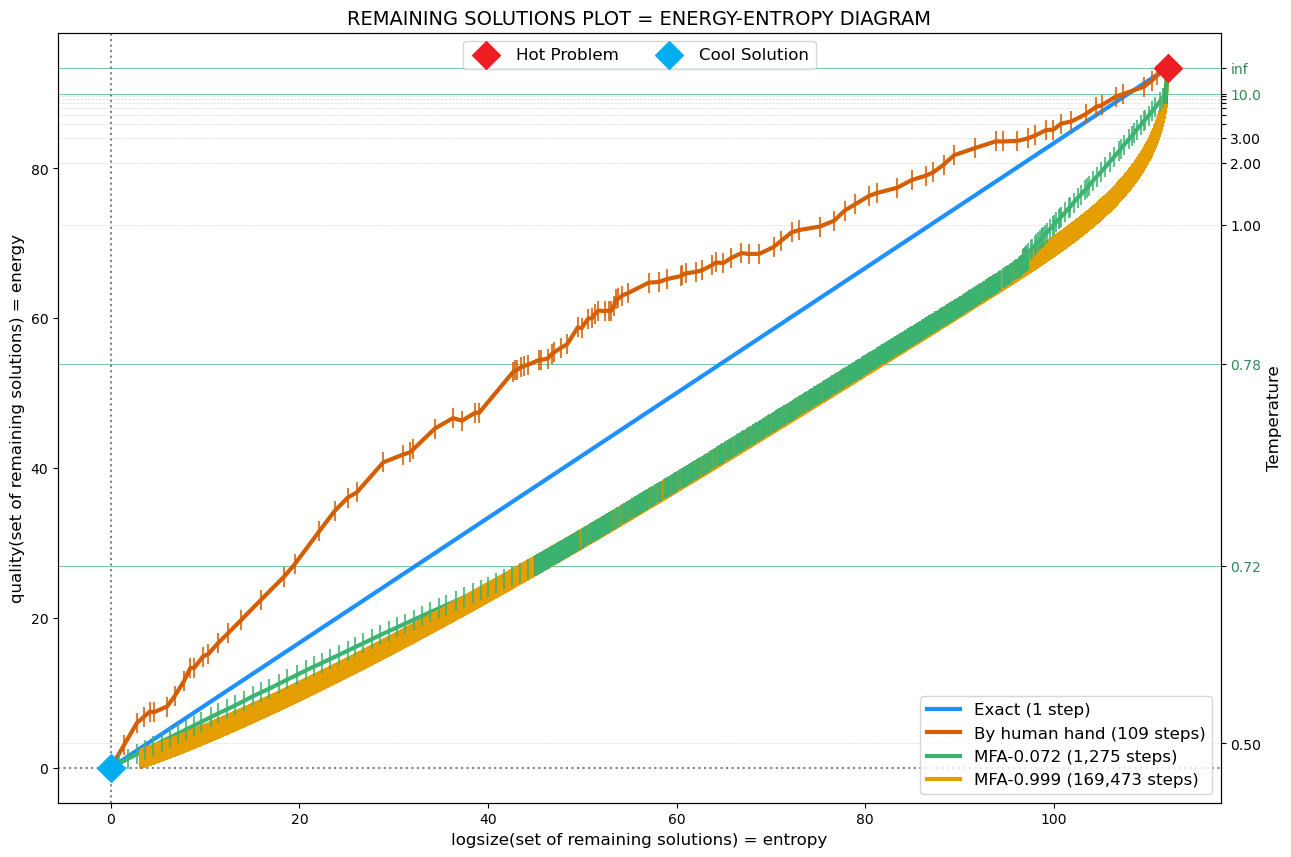

In [10]:
colors = [orange,bluishgreen,'dodgerblue',vermillion,'dodgerblue']
# colors = ['tab:purple','tab:olive','tab:cyan',vermillion,'dodgerblue']
styles = ['dotted','dashed','dashdot','solid','solid']

set_linewidth = lambda x: 3 if x==3 else 1
set_linestyle = lambda x: styles[x]
set_color = lambda x: colors[x]
set_alpha = lambda x:  0.005 if x==3 else 0.25

fig = plt.figure()
fig.set_facecolor('lightblue')

fig, ax = plt.subplots(figsize=(15, 10))
plt.axvline(x=0, color="gray", linestyle="dotted")    
plt.axhline(y=0, color="gray", linestyle="dotted")    
plt.title('REMAINING SOLUTIONS PLOT = ENERGY-ENTROPY DIAGRAM')
plt.xlabel('logsize(set of remaining solutions) = entropy')
plt.ylabel('quality(set of remaining solutions) = energy')

markersize = 200

# EXACT
plt.plot([entropies[0], entropies[-1]], [energies[0], energies[-1]], color=color2, linewidth=3, label='Exact (1 step)',zorder=-1)
# plt.scatter([entropies[0]], [energies[0]], marker='D', color='#ED1D24', s=markersize,zorder=2, label='Hot Problem')
# plt.scatter([entropies[-1]], [energies[-1]], marker='D', color='#00AEEF', s=markersize,zorder=2, label='Cool Solution')

# BY HUMAN HAND
plt.plot(entropies,energies, linewidth=3, color=vermillion, label='By human hand (%.f steps)' % len(entropies),zorder=-1)
plt.scatter(entropies,energies, marker='|', color=vermillion, s=markersize, alpha=0.8,zorder=-1)

# CF=0.072
t,E,S,J,U= results[-1]
plt.plot(S,E, linewidth=3, color='mediumseagreen', label='MFA-0.072 ({:,} steps)'.format(len(S)),zorder=-1)
plt.scatter(S,E, marker='|', color='mediumseagreen', s=markersize, alpha=0.8,zorder=1)

# CF=0.999
t,E,S,J,U= results[0]
plt.plot(S,E, linewidth=3, color=orange, label='MFA-0.999 ({:,} steps)'.format(len(S)),zorder=-1)
plt.scatter(S,E, marker='|', color=orange, s=markersize, alpha=0.8,zorder=-1)

# EXACT
# plt.plot([entropies[0], entropies[-1]], [energies[0], energies[-1]], color=color2, linewidth=3, label='Exact (1 step)',zorder=-1)
h1 = plt.scatter([entropies[0]], [energies[0]], marker='D', color='#ED1D24', s=markersize,zorder=2)
h2 = plt.scatter([entropies[-1]], [energies[-1]], marker='D', color='#00AEEF', s=markersize,zorder=2)

ax.legend(loc='lower right')
ax2 = ax.twinx()

# ax2.get_yaxis().set_visible(False)
ax2.legend(handles=[h1,h2],labels=['Hot Problem','Cool Solution'],loc='upper center', ncol=2)


# ax.axvline(x=closest_row_0['Entropy'],color='lightgrey',linestyle='dashed',zorder=-3)
# ax.axhline(y=closest_row_0['Energy'],color='lightgrey',linestyle='dashed',zorder=-3)
# ax.axvline(x=closest_row_1['Entropy'],color='lightgrey',linestyle='dashed',zorder=-3)
# ax.axhline(y=closest_row_1['Energy'],color='lightgrey',linestyle='dashed',zorder=-3)

    
for value in pd.DataFrame(values)['Energy']:
    ax.axhline(y=value,color='gainsboro',linestyle='dashed',zorder=-3,lw=0.5)

for value in pd.DataFrame(values_01)['Energy']:
    ax.axhline(y=value,color='mediumseagreen',linestyle='solid',zorder=-3,lw=0.5)

ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(yticks)
ax2.set_yticklabels(yticklabels)
ax2.set_ylabel('Temperature')
for tick in ax2.get_yticklabels()[-4:]:
    tick.set_color("seagreen")
    
# fig.tight_layout() 
plt.savefig('../output/06-critical-cooling-factor-plot',transparent=True)

In [11]:
import pickle

ytick_information = {'yticklabels':yticklabels,'yticks':list(yticks.values)}
with open('ytick_information.pickle', 'wb') as file: 
    pickle.dump(ytick_information, file)    